Some prelimary code to see the local t-SVD process for third-order tensors

In [25]:
# import
import numpy as np
from data.synthetic_data import stripes
import tensor.tensor_product_wrapper as tp
from utils.plotting_utils import slice_subplots
import matplotlib.pyplot as plt
import similarity_metrics as sm

In [26]:
# choose product type {'f', 't', 'c'}
prod_type = 't'

In [27]:
# =================================================================================================================== #
# helper functions
def projection(A, U, prod_type):
    training_coeff = tp.ten_prod(tp.ten_tran(U, prod_type=prod_type), A, prod_type=prod_type)
    return tp.ten_prod(U, training_coeff, prod_type=prod_type)


In [28]:
# =================================================================================================================== #
# for reproducibility
np.random.seed(20)

# load data
img_shape = (8, 8)
num_classes = 4
training_data, training_labels = stripes(num_images_per_class=100, img_shape=img_shape, num_classes=num_classes)
test_data, test_labels = stripes(num_images_per_class=10, img_shape=img_shape, num_classes=num_classes)

# permute such that lateral slices are the images
training_data = training_data.transpose(0, 2, 1)
test_data = test_data.transpose(0, 2, 1)

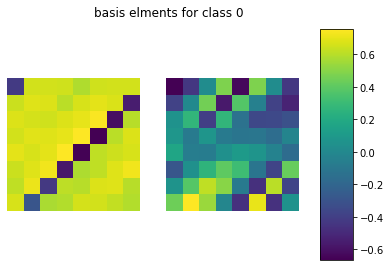

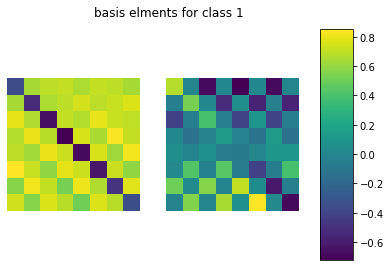

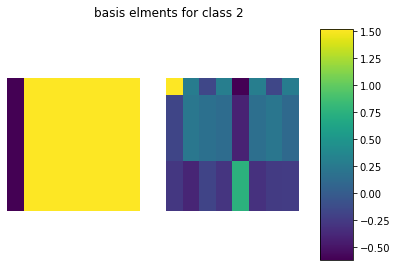

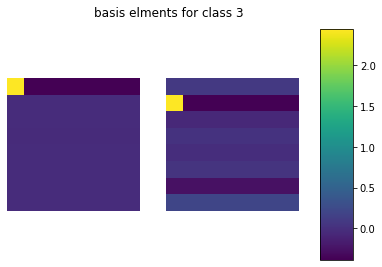

In [29]:
# form local t-svd
num_classes = len(np.unique(training_labels))
k = 2

U = []
for i in range(num_classes):
    u, _, _, _ = tp.ten_svd(training_data[:, training_labels == i, :], k, prod_type=prod_type)
    U.append(u)

# visualizations
for i in range(num_classes):
    slice_subplots(U[i], axis=1, title='basis elments for class ' + str(i))
    plt.show()

train accuracy = 87.00
test accuracy = 90.00


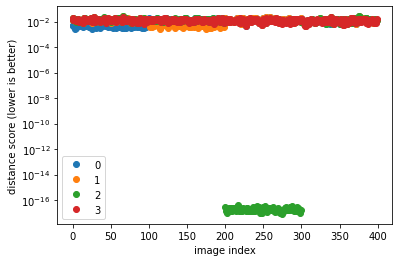

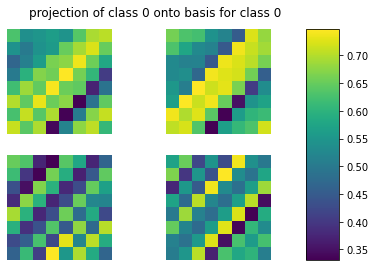

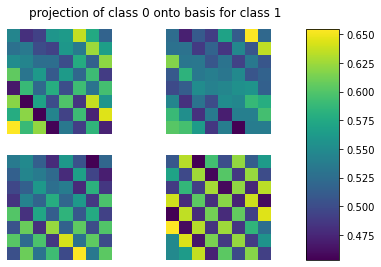

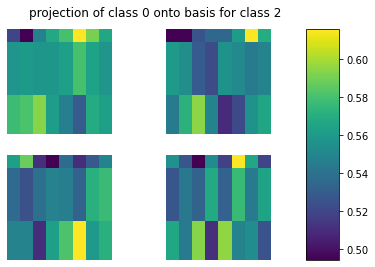

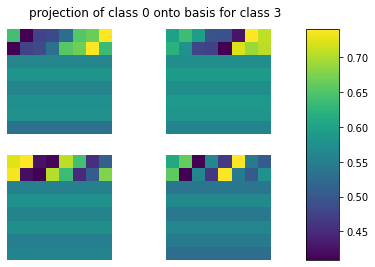

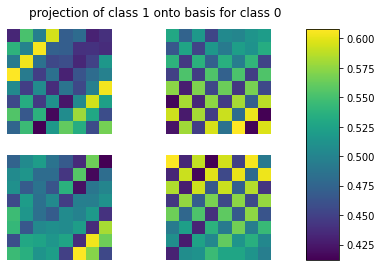

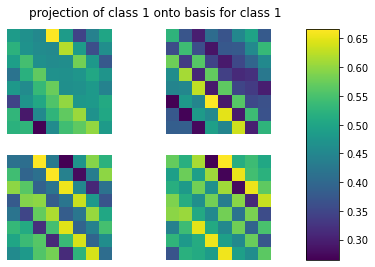

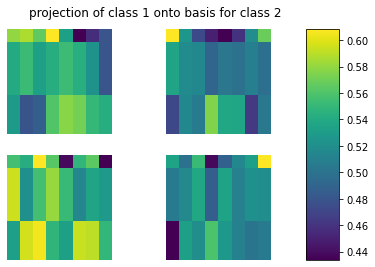

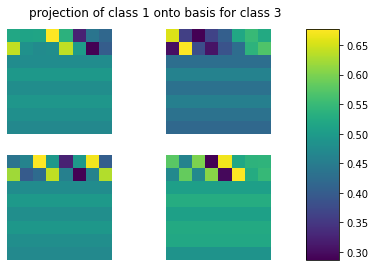

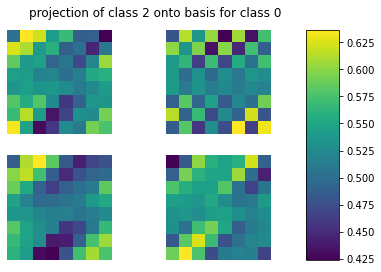

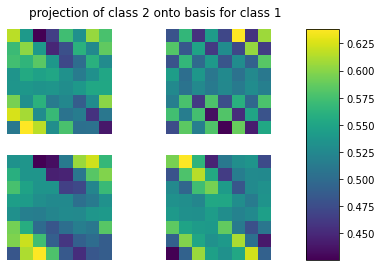

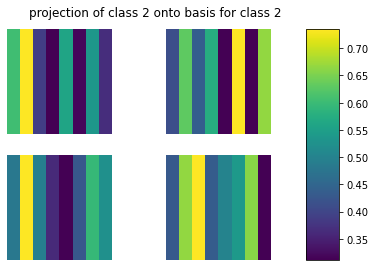

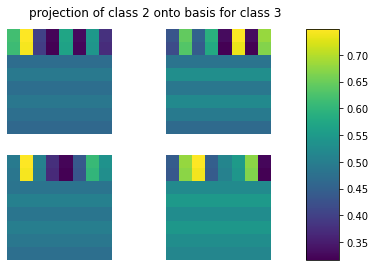

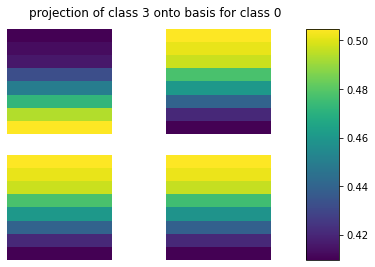

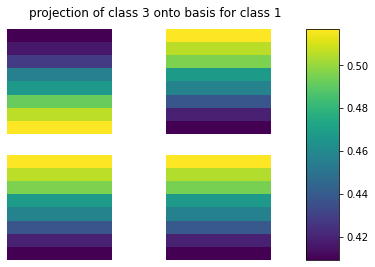

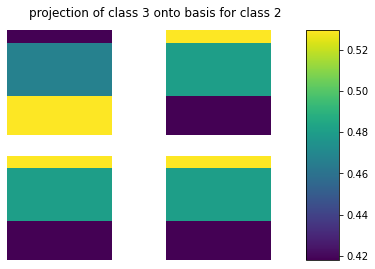

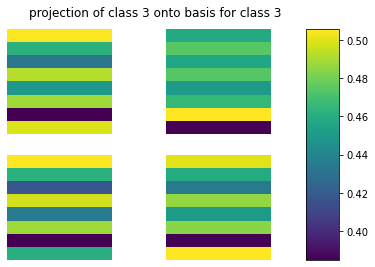

In [30]:
# compute results on training and test data
training_error = np.zeros([num_classes, training_data.shape[1]])
test_error = np.zeros([num_classes, test_data.shape[1]])
for i in range(num_classes):
    training_projection = projection(training_data, U[i], prod_type=prod_type)
    training_error[i, :] = sm.frobenius_metric(training_data, training_projection, axis=1)

    test_projection = projection(test_data, U[i], prod_type=prod_type)
    test_error[i, :] = sm.frobenius_metric(test_data, test_projection, axis=1)


# classification
training_predicted_classes = np.argmin(training_error, axis=0).reshape(-1)
test_predicted_classes = np.argmin(test_error, axis=0).reshape(-1)

# results
training_num_correct = np.sum(training_predicted_classes == training_labels)
training_accuracy = training_num_correct / training_data.shape[1]

test_num_correct = np.sum(test_predicted_classes == test_labels)
test_accuracy = test_num_correct / test_data.shape[1]

print('train accuracy = %0.2f' % (100 * training_accuracy))
print('test accuracy = %0.2f' % (100 * test_accuracy))

# plot results
plt.figure()
for i in range(num_classes):
    plt.semilogy(training_error[i, :], 'o', label=i)

plt.xlabel('image index')
plt.ylabel('distance score (lower is better)')
plt.legend()
plt.show()

# visualizations
for j in range(num_classes):
    for i in range(num_classes):
        A = projection(training_data[:, training_labels == j, :], U[i], prod_type=prod_type)
        slice_subplots(A[:, :4, :], axis=1, title='projection of class ' + str(j) + ' onto basis for class ' + str(i))
        plt.show()




